In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and clean the CSV files
def read_and_clean_csv(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    
    # Clean column names by stripping quotes and whitespace
    df.columns = df.columns.str.strip('"').str.strip()
    
    # For the first column, remove quotation marks and whitespace
    df.iloc[:, 0] = df.iloc[:, 0].str.strip('"').str.strip() if df.iloc[:, 0].dtype == 'object' else df.iloc[:, 0]
    
    return df

# Function to extract main categories
def extract_main_categories(df):
    # Identify main categories by finding rows that come right after blank rows
    # First, identify blank rows (rows where the first column is empty or NaN)
    blank_rows = df.iloc[:, 0].isna() | (df.iloc[:, 0] == '')
    
    # Find rows that come right after blank rows
    main_category_indices = []
    for i in range(1, len(blank_rows)):
        if blank_rows[i-1] and not blank_rows[i]:
            main_category_indices.append(i)
    
    # Also include the first row (which contains "Average Annual Expenditure")
    if not blank_rows[0]:
        main_category_indices.insert(0, 0)
    
    # Extract main categories and their data
    main_categories_df = df.iloc[main_category_indices].copy()
    
    return main_categories_df

# Read and clean the CSV files
df1 = read_and_clean_csv('../data/original/consumer06csv.csv')
df2 = read_and_clean_csv('../data/original/consumer13csv.csv')

# Extract main categories from each file
main_categories_df1 = extract_main_categories(df1)
main_categories_df2 = extract_main_categories(df2)

# Convert dollar values to numeric, removing $ and commas
def clean_dollar_values(df):
    for col in df.columns[1:]:  # Skip the first column (Item)
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace('$', '', regex=False)
            df[col] = df[col].str.replace(',', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

main_categories_df1 = clean_dollar_values(main_categories_df1)
main_categories_df2 = clean_dollar_values(main_categories_df2)

# Combine the two dataframes
# First, prepare the dataframes by setting the 'Item' column as index
main_categories_df1.set_index('Item', inplace=True)
main_categories_df2.set_index('Item', inplace=True)

# Now combine them
combined_df = pd.concat([main_categories_df1, main_categories_df2], axis=1)

# Reset index to make 'Item' a column again
combined_df.reset_index(inplace=True)

# Display the combined dataframe
print("Combined data for main spending categories (2006-2020):")
print(combined_df)

# Save the combined data to a new CSV file
combined_df.to_csv('combined_consumer_spending_2006_2020.csv', index=False)
print("\nData saved to 'combined_consumer_spending_2006_2020.csv'")


Combined data for main spending categories (2006-2020):
                                              Item     2006     2007     2008  \
0                       Average Annual Expenditure  48400.0  49638.0  50486.0   
1                                             Food   6111.0   6133.0   6443.0   
2                              Alcoholic beverages    497.0    457.0    444.0   
3                                          Housing  16366.0  16920.0  17109.0   
4                             Apparel and services   1874.0   1881.0   1801.0   
5                                   Transportation   8508.0   8758.0   8604.0   
6                                       Healthcare   2766.0   2853.0   2976.0   
7                                    Entertainment   2377.0   2698.0   2835.0   
8              Personal care products and services    585.0    588.0    616.0   
9                                          Reading    117.0    118.0    116.0   
10                                       Education   

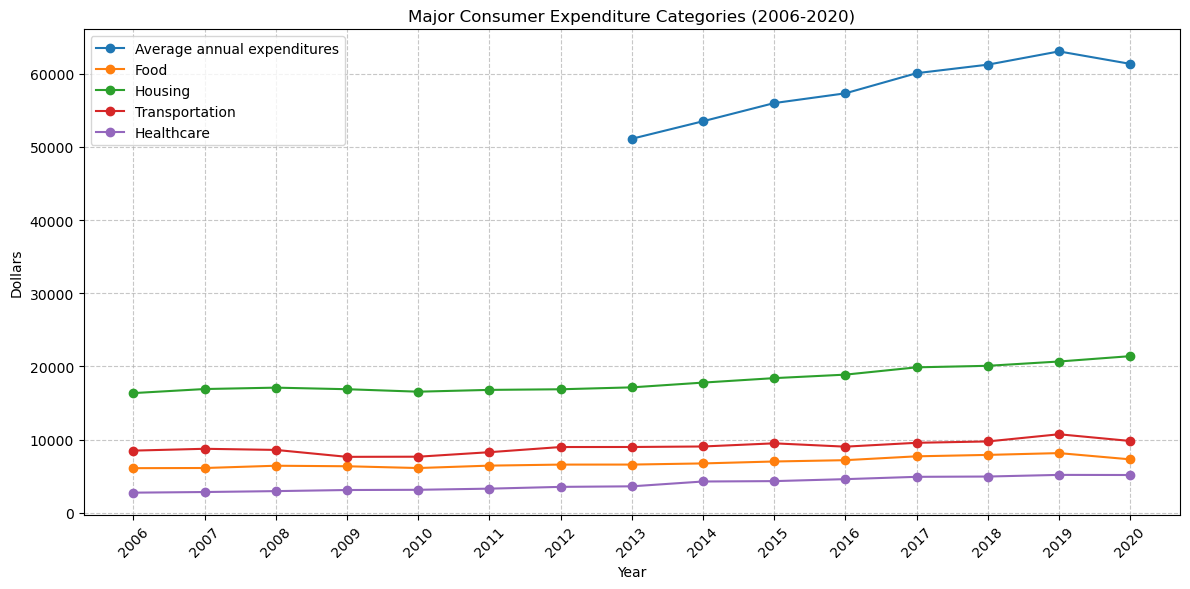

Created visualization 'consumer_spending_trends.png'

Percentage change in spending from 2006 to 2020:
Average annual expenditures: nan%
Food: 19.72%
Housing: 30.81%
Transportation: 15.49%
Healthcare: 87.17%


In [28]:
# Let's also create a visualization for one of the main categories over time
plt.figure(figsize=(12, 6))

# Select a few interesting categories to plot
categories_to_plot = ['Average annual expenditures', 'Food', 'Housing', 'Transportation', 'Healthcare']

for category in categories_to_plot:
    # Find the row for this category
    if category in combined_df['Item'].values:
        row = combined_df[combined_df['Item'] == category]
        # Extract year columns and values
        years = [col for col in row.columns if col != 'Item']
        values = row.iloc[0, 1:].values
        plt.plot(years, values, marker='o', label=category)

plt.title('Major Consumer Expenditure Categories (2006-2020)')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('consumer_spending_trends.png')
plt.show()

print("Created visualization 'consumer_spending_trends.png'")

# Let's analyze the percentage change in major categories from 2006 to 2020
if 'Item' in combined_df.columns and '2006' in combined_df.columns and '2020' in combined_df.columns:
    print("\nPercentage change in spending from 2006 to 2020:")
    for category in categories_to_plot:
        if category in combined_df['Item'].values:
            row = combined_df[combined_df['Item'] == category]
            val_2006 = row['2006'].values[0]
            val_2020 = row['2020'].values[0]
            percent_change = ((val_2020 - val_2006) / val_2006) * 100
            print(f"{category}: {percent_change:.2f}%")